# <span style="color:#0073e6">0. 사례준비</span>
<style>
@media print
{
h1 {page-break-before:always}
}
</style>

> **Libaray & Environment Settings** 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('axes', unicode_minus=False)
%matplotlib inline

np.random.seed(1234)

> **CREDIT RISK DATA SET LOADING**

In [2]:
train = pd.read_csv('data/cs-training.csv')
train.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime30-59dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime60-89dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
test = pd.read_csv('data/cs-test.csv')
test.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime30-59dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime60-89dayspastduenotworse,numberofdependents
0,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [4]:
raw = pd.concat([train,test]).reset_index(drop=True)
raw.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime30-59dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime60-89dayspastduenotworse,numberofdependents
0,1.0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0.0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0.0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0.0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0.0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


- - -
# <span style="color:#0073e6">1. Part I: 데이터 준비</span>
### 1.1. Basic Data Preprocessing
> **기초 데이터 분석 절차**
> > 1. 통계치 확인
> > 2. 결측치 확인
> > 3. 결측치 대체/제거
> > 4. 이상치(outlier) 탐지 
> > 5. 상관관계 확인

> **EDA(Exploratory Data Analysis)**
> > 데이터가 실제(fact)를 어떻게 표현하고 있는지 이해<br/>
<br>
> > 통계치 확인

In [5]:
train.describe().T.iloc[:,3:]

,min,25%,50%,75%,max
seriousdlqin2yrs,0.0,0.000000,0.000000,0.000000,1.0
revolvingutilizationofunsecuredlines,0.0,0.029867,0.154181,0.559046,50708.0
age,0.0,41.000000,52.000000,63.000000,109.0
numberoftime30-59dayspastduenotworse,0.0,0.000000,0.000000,0.000000,98.0
debtratio,0.0,0.175074,0.366508,0.868254,329664.0
monthlyincome,0.0,3400.000000,5400.000000,8249.000000,3008750.0
numberofopencreditlinesandloans,0.0,5.000000,8.000000,11.000000,58.0
numberoftimes90dayslate,0.0,0.000000,0.000000,0.000000,98.0
numberrealestateloansorlines,0.0,0.000000,1.000000,2.000000,54.0
numberoftime60-89dayspastduenotworse,0.0,0.000000,0.000000,0.000000,98.0


> > 목표변수의 분포 확인

In [6]:
train.seriousdlqin2yrs.value_counts(normalize=True)

0    0.93316
1    0.06684
Name: seriousdlqin2yrs, dtype: float64

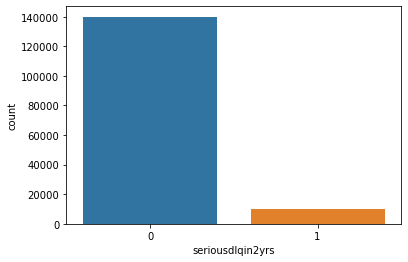

In [7]:
sns.countplot(x='seriousdlqin2yrs', data=train);

> **결측치 확인 및 시각화**
> > 개수를 확인할 경우에는 .sum() <br/>
<br>
> > 비율을 확인할 경우에는 .mean() <br/>
<br>

In [8]:
raw.isnull().sum()

seriousdlqin2yrs                        101503
revolvingutilizationofunsecuredlines         0
age                                          0
numberoftime30-59dayspastduenotworse         0
debtratio                                    0
monthlyincome                            49834
numberofopencreditlinesandloans              0
numberoftimes90dayslate                      0
numberrealestateloansorlines                 0
numberoftime60-89dayspastduenotworse         0
numberofdependents                        6550
dtype: int64

> > 결측치 시각화 <br/>

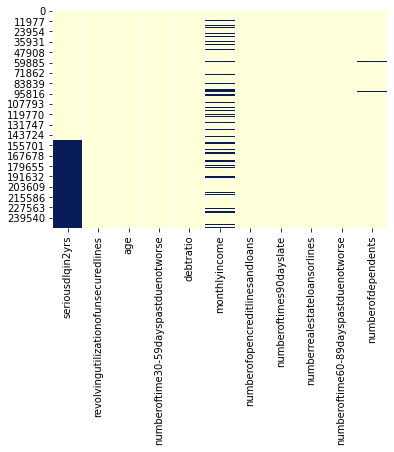

In [9]:
sns.heatmap(raw.isnull(), cbar=False, cmap='YlGnBu');

> **결측치 처리**
> > 결측치를 꼭 대체해야하는 것일까? <br/>
> > - Trial and error method <br/>
> >
> > 결측치 대체에 가장 많이 사용되는 방법? <br/>
> > - 평균 또는 중앙값을 사용 <br/>
> > - 범주형은 최빈값을 사용 <br/>
> >
> > 결측치 대체에 사용가능한 다른 방법은 없을까? <br/>
> > - KNN 사용 등

In [10]:
raw.seriousdlqin2yrs = raw.seriousdlqin2yrs.fillna(3)
raw = raw.fillna(train.median())
raw.isnull().sum()

seriousdlqin2yrs                        0
revolvingutilizationofunsecuredlines    0
age                                     0
numberoftime30-59dayspastduenotworse    0
debtratio                               0
monthlyincome                           0
numberofopencreditlinesandloans         0
numberoftimes90dayslate                 0
numberrealestateloansorlines            0
numberoftime60-89dayspastduenotworse    0
numberofdependents                      0
dtype: int64

> **이상치(Outlier) 기준**
> > 백분위 기준 <br/>

In [11]:
def percentile_outlier(data, threshold=95):
    diff = (100-threshold) / 2
    minval, maxval = np.percentile(data, [diff, 100-diff])
    return ((data<minval) | (data>maxval))

> > Whisker 기준 <br/>
> > <img src="https://jingwen-z.github.io/images/20190319-boxplot-vs-pdf.png" width="450">

In [12]:
def whisker_outlier(data):
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    lower_w = np.percentile(data, 25) - 1.5*iqr
    upper_w = np.percentile(data, 75) + 1.5*iqr
    return ((data<lower_w) | (data>upper_w))

> > STD (Standard Deviation) 기준 <br/>
> > <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/1200px-Standard_deviation_diagram.svg.png" width="450">

In [13]:
def std_outlier(data, threshold=2):
    std_y = data.std()
    mean_y = data.mean()
    z = (data - mean_y) / std_y
    return np.abs(z) > threshold

> > Outlier Voting <br/>

In [14]:
def voting(data):
    x = percentile_outlier(data)
    y = whisker_outlier(data)
    z = std_outlier(data)
    vot = x.astype('int') + y.astype('int') + z.astype('int')
    return vot >= 2

> **이상치(Outlier) 시각화**
> > 시각화 함수의 준비 <br/>

In [15]:
def out_plot(x):
    fig, axes= plt.subplots(nrows=4, figsize=(15,10))
    for ax, func in zip(axes, 
                        [percentile_outlier, 
                         whisker_outlier, 
                         std_outlier, 
                         voting]):
        sns.kdeplot(x, ax=ax)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)
        
    kwargs = dict(y=0.95, x=0.05, ha='left', va='top', size=10)
    axes[0].set_title('Percentile-based', **kwargs)
    axes[1].set_title('MAD-based', **kwargs)
    axes[2].set_title('STD-based', **kwargs)
    axes[3].set_title('Majority Vote', **kwargs)

> **이상치(Outlier) 처리**
> > Revolving Utilization of Unsecured Lines <br/>
> > - 비율임에도 1이상인 이상치가 많이 발견됨
> > - 1이상을 1로 처리

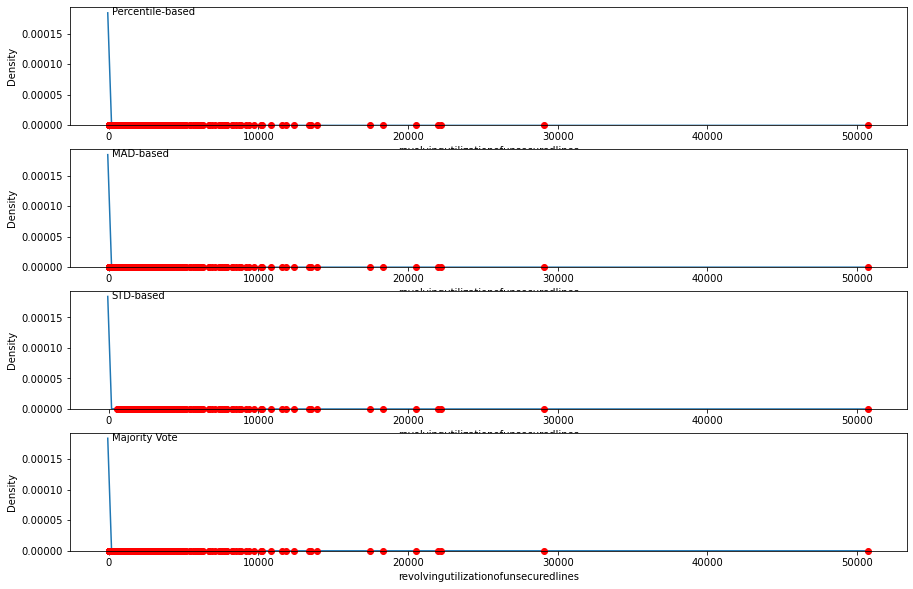

In [16]:
out_plot(train.revolvingutilizationofunsecuredlines)

In [17]:
raw.loc[raw.revolvingutilizationofunsecuredlines>=1, 
        'revolvingutilizationofunsecuredlines'] = 1
raw.revolvingutilizationofunsecuredlines.describe()

count    251503.000000
mean          0.319544
std           0.349920
min           0.000000
25%           0.029977
50%           0.153575
75%           0.561293
max           1.000000
Name: revolvingutilizationofunsecuredlines, dtype: float64

> > Age <br/>
> > - 21살 이하는 21살로 변경

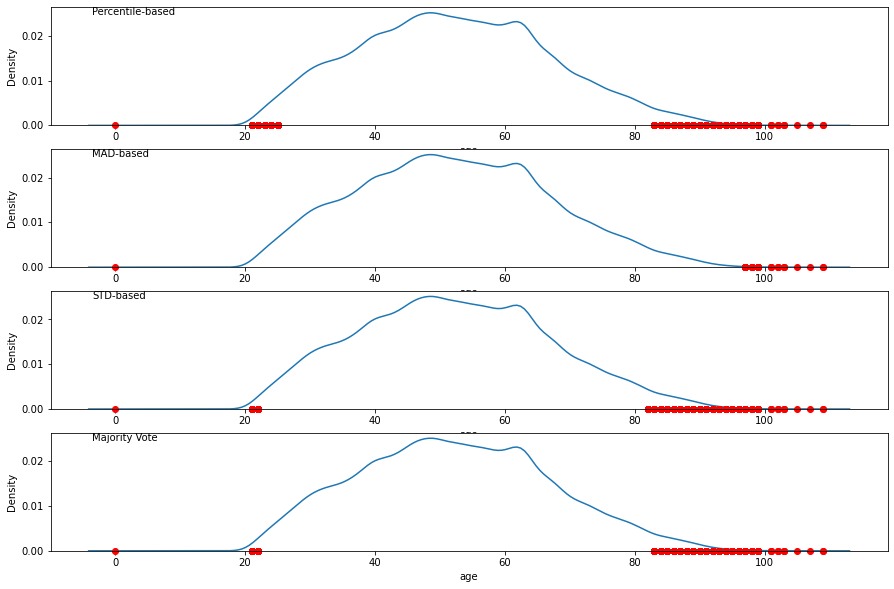

In [18]:
out_plot(train.age)

In [19]:
raw.loc[raw.age<=21, 'age'] = 21
raw.age.describe()

count    251503.000000
mean         52.339777
std          14.774884
min          21.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

> > Number of time 30-59days past due not worse <br/>
> > - 결측치를 96과 98로 표현한 데이터
> > - 중앙값으로 이상치 대체

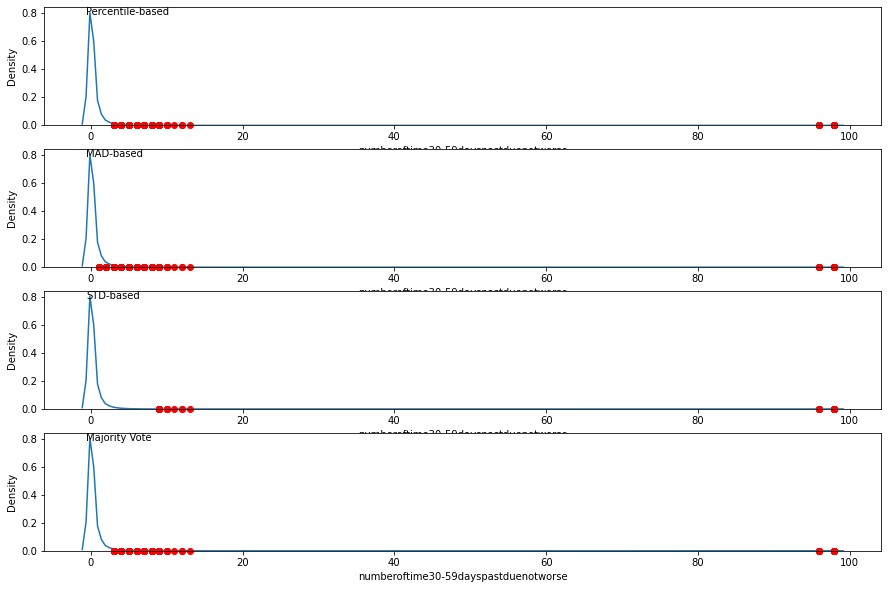

In [20]:
out_plot(train['numberoftime30-59dayspastduenotworse'])

In [21]:
raw.loc[raw['numberoftime30-59dayspastduenotworse']>15,
            'numberoftime30-59dayspastduenotworse'] = np.nan
raw = raw.fillna(train.median())
raw['numberoftime30-59dayspastduenotworse'].describe()

count    251503.000000
mean          0.246013
std           0.699680
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          13.000000
Name: numberoftime30-59dayspastduenotworse, dtype: float64

> > Debt Ratio <br/>
> > - Majority Vote 기법으로 이상치 처리

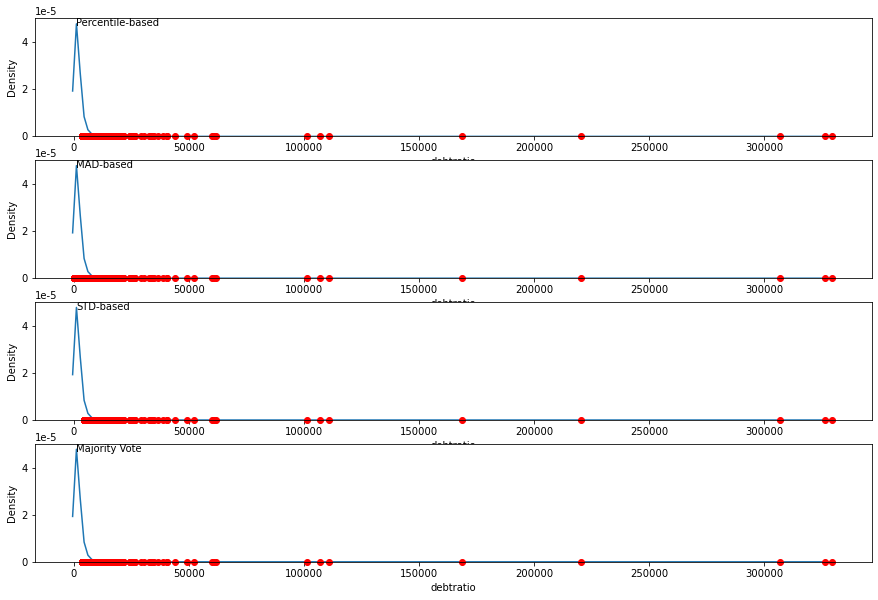

In [22]:
out_plot(train.debtratio)

In [23]:
maxbound = max(train.debtratio[~voting(train.debtratio)])
raw.loc[raw.debtratio>=maxbound, 'debtratio'] = maxbound
raw.debtratio.describe()

count    251503.000000
mean        291.290298
std         797.063762
min           0.000000
25%           0.174330
50%           0.365612
75%           0.861754
max        3489.000000
Name: debtratio, dtype: float64

> **나머지 변수의 처리**

In [24]:
maxbound = max(train.monthlyincome[~voting(train.monthlyincome)])
raw.loc[raw.monthlyincome>=maxbound, 'monthlyincome'] = maxbound

raw.loc[raw['numberoftimes90dayslate']>15,
            'numberoftimes90dayslate'] = np.nan
raw = raw.fillna(train.median())

raw.loc[raw.numberrealestateloansorlines>17, 
        'numberrealestateloansorlines'] = 17

raw.loc[raw['numberoftime60-89dayspastduenotworse']>15,
            'numberoftime60-89dayspastduenotworse'] = np.nan
raw = raw.fillna(train.median())

raw.loc[raw.numberofdependents>10, 
        'numberofdependents'] = 10


> **상관관계 확인**


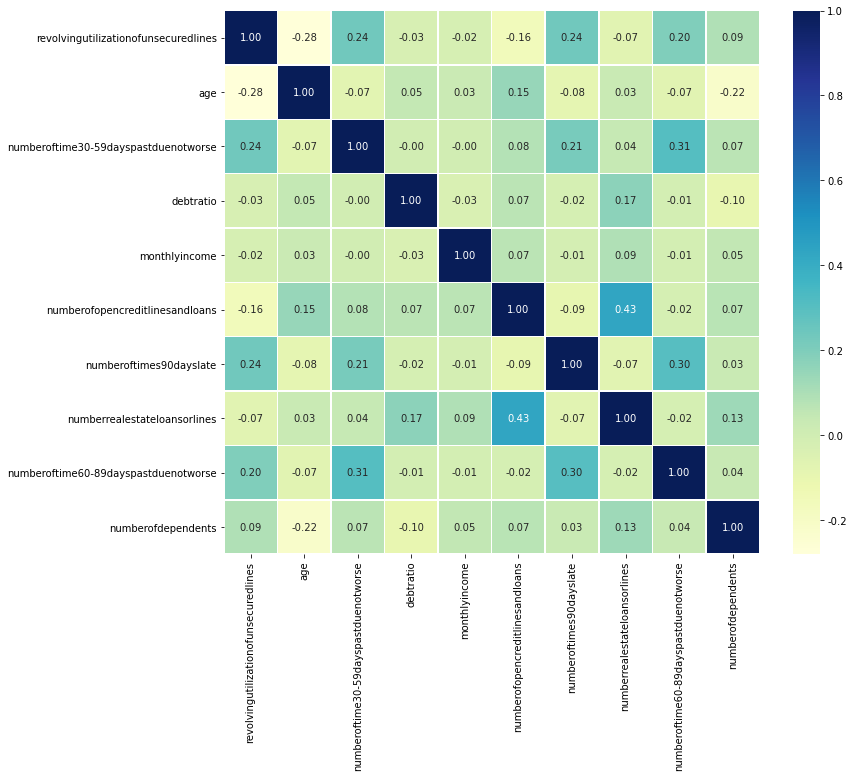

In [25]:
fig, ax = plt.subplots(figsize=(12,10))
ax = sns.heatmap(raw.iloc[:,1:].corr(), annot=True, 
                 fmt='.2f', 
                 linewidths=.5, 
                 cmap='YlGnBu')
ax.set_ylim(10, 0);

In [26]:
train = raw[raw.seriousdlqin2yrs<3].reset_index(drop=True)
test = raw[raw.seriousdlqin2yrs==3].reset_index(drop=True)
train.to_csv('data/cs-training_ver02.csv', index=False)
test.to_csv('data/cs-test_ver02.csv', index=False)

### 1.2. Feature Engineering
> **Baseline을 위한 특성공학**
> > 중요 변수의 확인 <br/>
<br>
> > Lasso Regression : 중요변수의 수 확인<br/>
<br>
> > Random Forest : 특성 중요도 확인<br/>
<br>


In [27]:
x = train.drop('seriousdlqin2yrs', axis='columns')
labels = x.columns
y = train.seriousdlqin2yrs

> **Lasso를 활용한 특성 수의 발견**


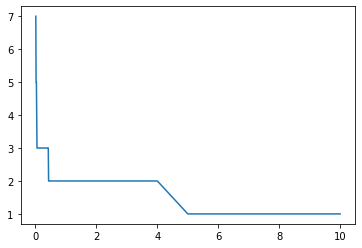

In [28]:
from sklearn.linear_model import Lasso

my_range = np.concatenate([np.arange(1,101)/100,
                           np.arange(2,11)])
results = []
for a in my_range:
    lasso = Lasso(alpha=a)
    lasso.fit(x,y)
    results.append(sum(lasso.coef_ != 0))
    
sns.lineplot(x=my_range, y=results);

> **RandomForest를 활용한 특성 중요도 계산**


In [29]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 300, n_jobs = -1)
forest.fit(x,y)

RandomForestClassifier(n_estimators=300, n_jobs=-1)

In [30]:
imp = forest.feature_importances_
idx = np.argsort(imp)[::-1]
for i in range(len(labels)):
    print ('%2d) %-*s %f'% (i+1, 50, labels[i], imp[idx[i]]))

 1) revolvingutilizationofunsecuredlines               0.183821
 2) age                                                0.179739
 3) numberoftime30-59dayspastduenotworse               0.151453
 4) debtratio                                          0.132826
 5) monthlyincome                                      0.093275
 6) numberofopencreditlinesandloans                    0.088409
 7) numberoftimes90dayslate                            0.049419
 8) numberrealestateloansorlines                       0.043542
 9) numberoftime60-89dayspastduenotworse               0.043022
10) numberofdependents                                 0.034495


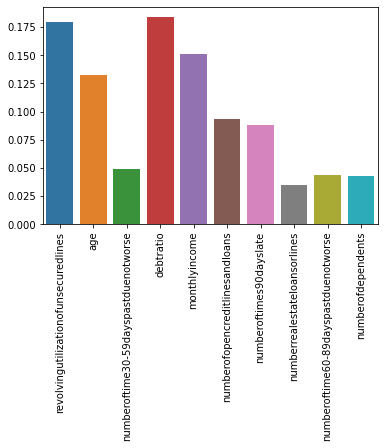

In [31]:
sns.barplot(x=labels, y=imp);
plt.xticks(range(len(labels)), labels, rotation=90);

- - -
# <span style="color:#2EFE9A">.</span>